# 1. Import Necessary Libraries

This cell imports all the required libraries for data manipulation, visualization, and machine learning preprocessing:
- `pandas` and `numpy` for data handling,
- `seaborn` and `matplotlib.pyplot` for plotting,
- `OneHotEncoder` and `StandardScaler` for encoding and scaling features,
- `mutual_info_regression` for feature selection based on mutual information.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_regression

# 2. Load the Cleaned Dataset

The cleaned dataset is loaded from a CSV file into a pandas DataFrame called `df`. This is the starting point for further preprocessing and analysis.

---

In [4]:
# Load the cleaned dataset from Data Architect A
df = pd.read_csv("../data/cleaned_data_stage1.csv")
df

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_cc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,103.807692
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,126.923077
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,108.552632
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,127.981651
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,128.308824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,119.468085
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,135.070922
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,124.190751
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,154.965517


# 3. Display Initial Info

This cell prints a confirmation that the dataset is loaded, displays the first few rows, and prints the DataFrame's info (column types, non-null counts, etc.) to help understand the data structure.

---

In [5]:
# Display initial info
print("✅ Dataset Loaded")
display(df.head())
print(df.info())

✅ Dataset Loaded


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_cc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,103.807692
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,126.923077
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,108.552632
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,127.981651
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,128.308824


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 4. One-Hot Encode Categorical Columns

Categorical columns are identified and one-hot encoded using `OneHotEncoder`. The encoded columns are concatenated with the original DataFrame (with original categorical columns dropped), resulting in `df_encoded`, which contains only numeric data suitable for machine learning.

---

In [6]:
# --------------------------
# 1. One-Hot Encode Categorical Columns
# --------------------------

# Select categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Initialize encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Encode and convert to DataFrame
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add encoded ones
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

print("✅ One-Hot Encoding Complete")
display(df_encoded.head())

✅ One-Hot Encoding Complete


/Users/nasraibrahim/Documents/Hackathon-car price analysis/hackathon-car-price-analysis/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 5. Scale Numerical Features

All numerical features (except the target, assumed to be `'price'`) are standardized using `StandardScaler`. The scaled features are combined with the target variable to form `df_final`, ensuring all features are on a similar scale for modeling.

In [7]:
# --------------------------
# 2. Scale Numerical Features
# --------------------------

# Scale all numerical features except the target (assuming 'price' is the target)
numerical_cols = df_encoded.drop(columns=['price']).select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)

# Combine scaled features with the target
df_final = pd.concat([scaled_df, df_encoded['price'].reset_index(drop=True)], axis=1)

print("✅ Feature Scaling Complete")
display(df_final.head())


✅ Feature Scaling Complete


,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13495.0
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13950.0
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,17450.0


# 6. Feature Selection (Optional but Recommended)

This cell visualizes feature correlations with a heatmap and computes mutual information scores between features and the target. The top features are displayed and optionally selected for further modeling, resulting in `df_selected` with only the most important features and the target.

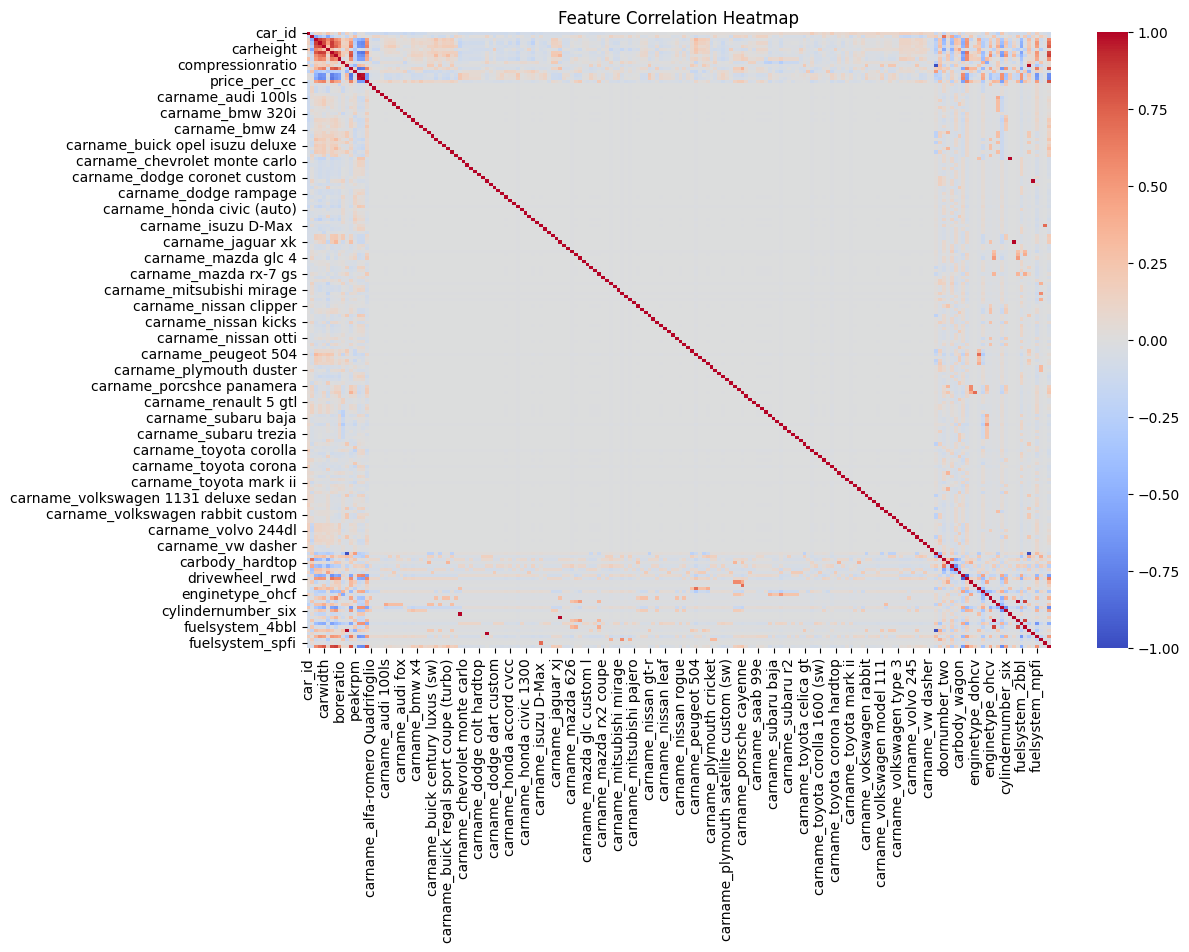

📊 Top Features Based on Mutual Information:


price_per_cc    0.897184
curbweight      0.859148
horsepower      0.851014
highwaympg      0.843897
enginesize      0.834178
citympg         0.725958
carwidth        0.681601
wheelbase       0.567009
carlength       0.554641
boreratio       0.447899
dtype: float64

In [8]:
# --------------------------
# 3. Feature Selection (Optional but Recommended)
# --------------------------

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Mutual Information for Feature Importance
X = df_final.drop(columns='price')
y = df_final['price']

mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("📊 Top Features Based on Mutual Information:")
display(mi_series.head(10))

# (Optional) Keep top N features for model/dashboard
top_features = mi_series.head(15).index.tolist()
df_selected = df_final[top_features + ['price']]

# 7. Export Final Dataset

The final selected and processed dataset (`df_selected`) is saved to a CSV file for use in modeling or dashboarding. This ensures reproducibility and easy access to the cleaned, feature-engineered data.

In [10]:
# --------------------------
# 4. Export Final Dataset
# --------------------------

df_selected.to_csv("../data/final_cleaned_dataset.csv", index=False)
print("✅ Final dataset saved to 'final_cleaned_dataset.csv'")

✅ Final dataset saved to 'final_cleaned_dataset.csv'


# Final Summary of the Notebook Workflow

This notebook demonstrates a complete machine learning data preprocessing pipeline for a car price dataset. Here’s a step-by-step summary:

1. **Import Libraries**:  
    Essential libraries for data manipulation (`pandas`, `numpy`), visualization (`seaborn`, `matplotlib`), and machine learning preprocessing (`OneHotEncoder`, `StandardScaler`, `mutual_info_regression`) are imported.

2. **Load Dataset**:  
    The cleaned dataset is loaded from a CSV file into a DataFrame (`df`).

3. **Initial Data Exploration**:  
    The notebook displays the first few rows and prints the DataFrame’s info to understand the structure and types of the data.

4. **One-Hot Encoding**:  
    Categorical columns are identified and one-hot encoded using `OneHotEncoder`. The resulting encoded columns are concatenated with the original DataFrame (after dropping the original categorical columns), resulting in `df_encoded` with only numeric data.

5. **Feature Scaling**:  
    All numerical features (except the target variable `price`) are standardized using `StandardScaler`. The scaled features are combined with the target to form `df_final`, ensuring all features are on a similar scale.

6. **Feature Selection**:  
    - A correlation heatmap is plotted to visualize feature relationships.
    - Mutual information scores between features and the target are computed to assess feature importance.
    - The top features are selected (e.g., top 15) and used to create `df_selected` for modeling.

7. **Export Final Dataset**:  
    The final processed and selected dataset (`df_selected`) is saved to a CSV file for future modeling or dashboarding.

**Key Variables Created:**
- `df`: Original loaded DataFrame.
- `df_encoded`: DataFrame after one-hot encoding.
- `df_final`: DataFrame after scaling.
- `df_selected`: DataFrame with selected top features and target.
- `encoder`, `scaler`: Fitted preprocessing objects.
- `mi_scores`, `mi_series`: Mutual information scores and their Series.
- `top_features`: List of selected top features.

This workflow ensures the dataset is clean, numeric, scaled, and contains only the most relevant features for downstream machine learning tasks.